In [43]:
import sunpy 
import sunpy.map
from sunpy.physics.differential_rotation import solar_rotate_coordinate
from sunpy.coordinates import get_horizons_coord, Helioprojective
import numpy as np
import astropy
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.visualization import ImageNormalize, AsinhStretch
from glob import glob
import matplotlib.pyplot as plt
import h5py
import cv2

In [23]:
solo_coord1 = get_horizons_coord("solar orbiter",time="2022-10-24T00:00:00")
solo_coord2 = get_horizons_coord("solar orbiter",time="2022-10-24T01:00:00")

INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144 [sunpy.coordinates.ephemeris]


In [24]:
disk_center_1 = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime=solo_coord1.obstime, observer=solo_coord1,frame="helioprojective")
disk_center_2 = SkyCoord(0*u.arcsec, 0*u.arcsec, obstime=solo_coord2.obstime, observer=solo_coord2,frame="helioprojective")

In [25]:
solar_rotate_coordinate(disk_center_1, observer=solo_coord2).Tx, solar_rotate_coordinate(disk_center_1, observer=solo_coord2).Ty

(<Longitude 17.95144122 arcsec>, <Latitude -0.74262977 arcsec>)

In [26]:
eui_files = sorted(glob("../../src/EUI/HRI/euv174/20221024/solo_L2_eui-hri*.fits"))

In [27]:
eui_seq = sunpy.map.Map(eui_files[::60], sequence=True)

Observatory,Solar Orbiter
Instrument,EUI
Detector,HRI_EUV
Measurement,174.0 Angstrom
Wavelength,174.0 Angstrom
Observation Date,2022-10-24 19:00:00
Exposure Time,1.65 s
Dimension,[2048. 2048.] pix
Coordinate System,helioprojective
Scale,[0.492 0.492] arcsec / pix
Reference Pixel,[895.5 959.5] pix

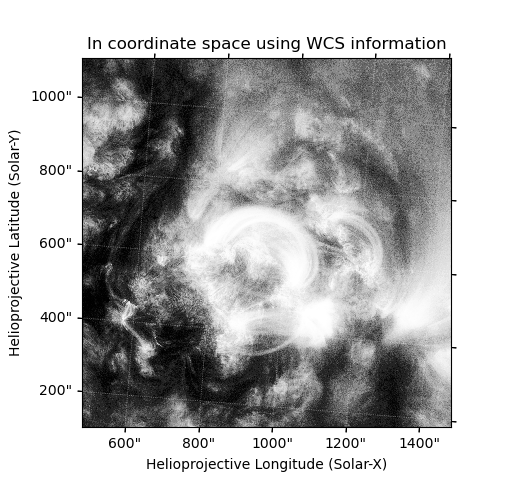
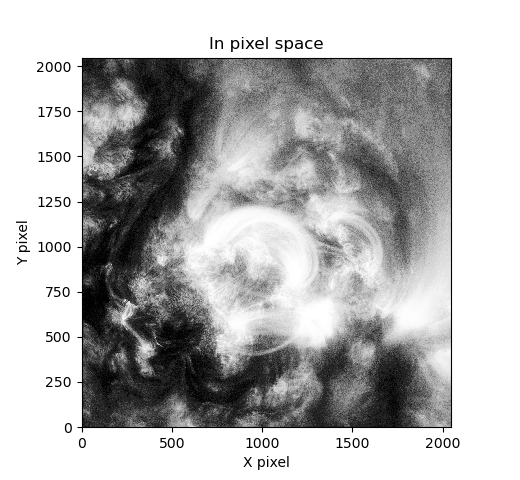
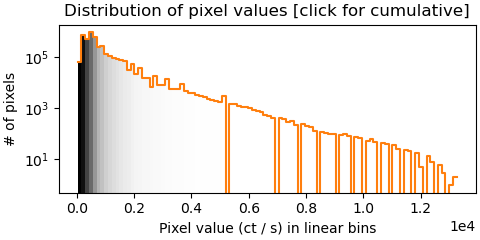
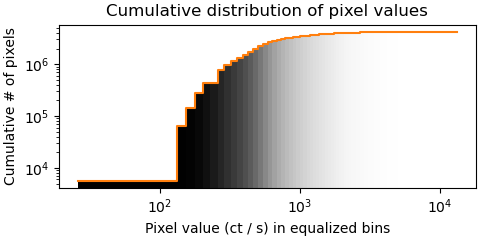
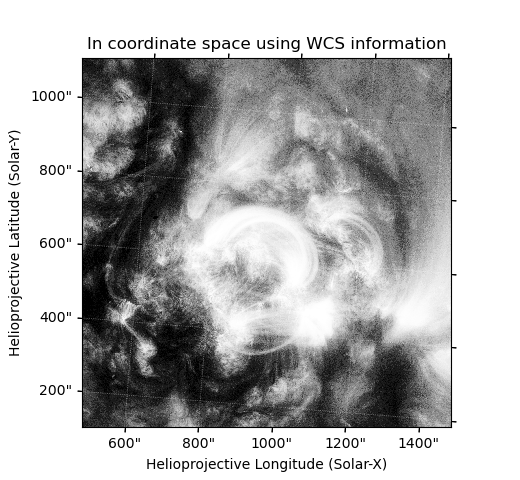
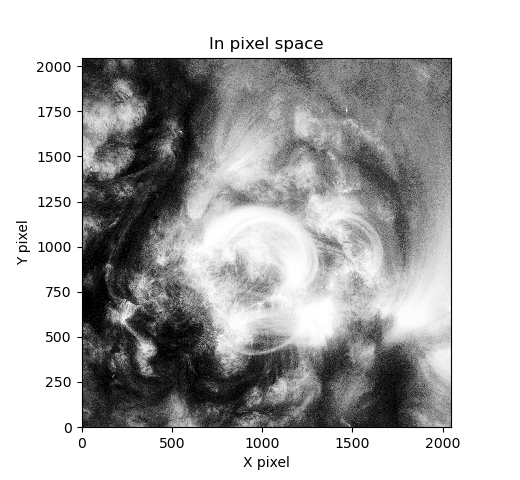
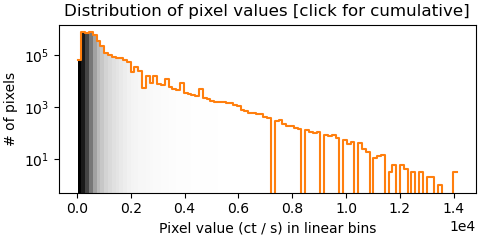
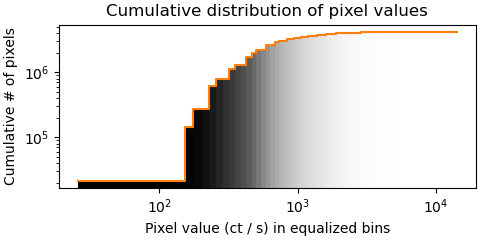
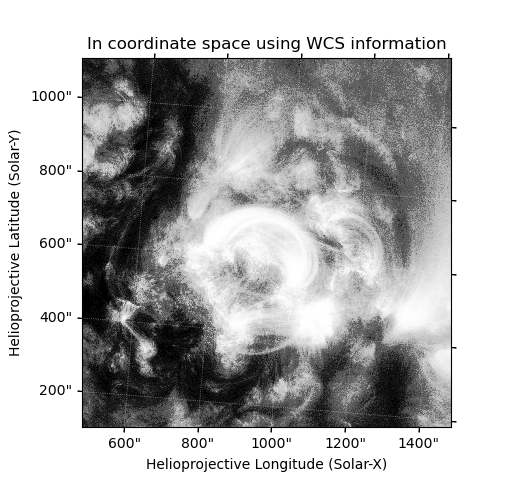
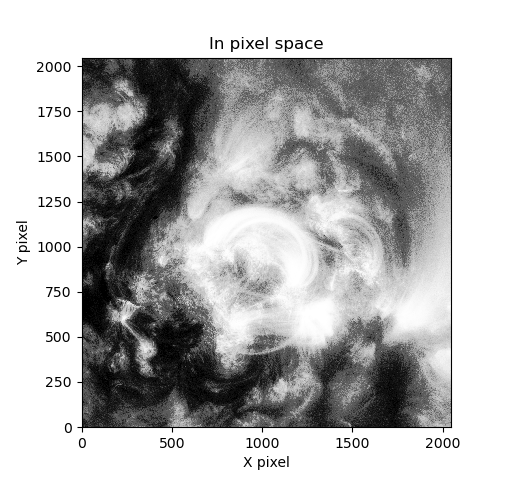
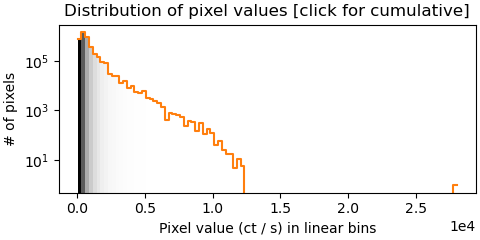
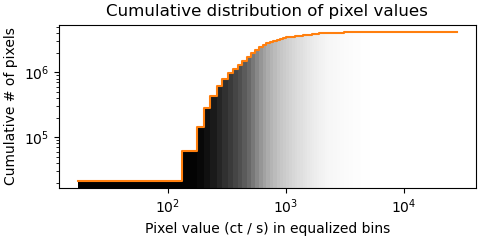
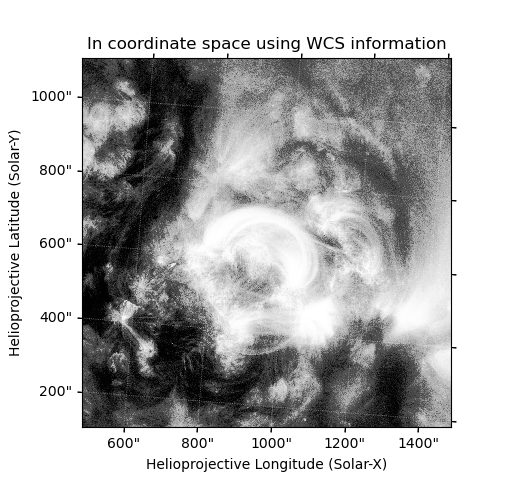
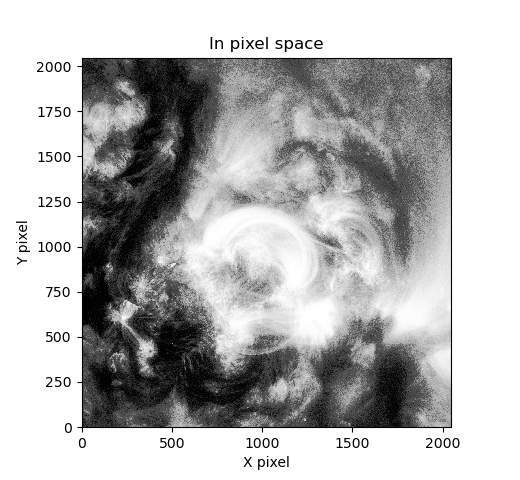
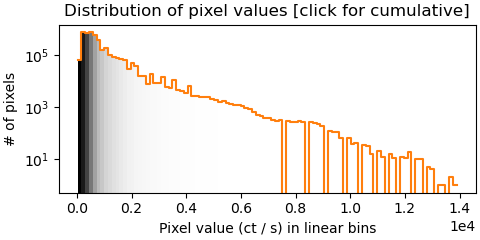
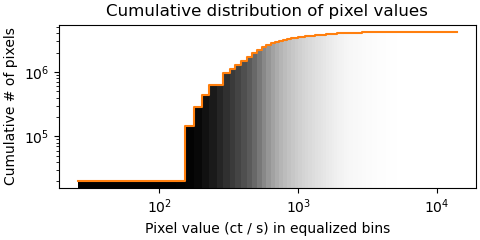
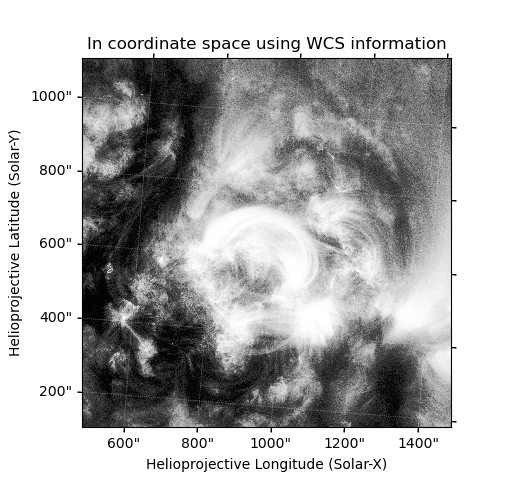
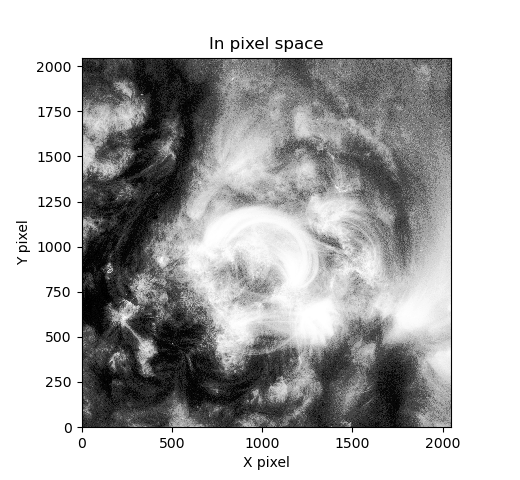
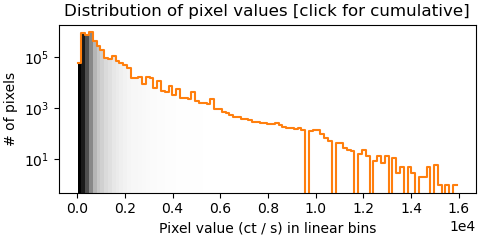
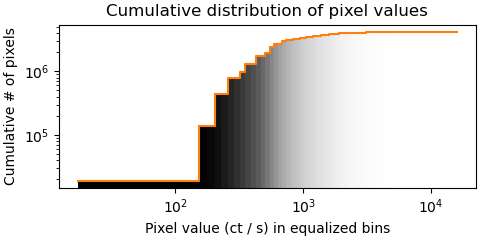
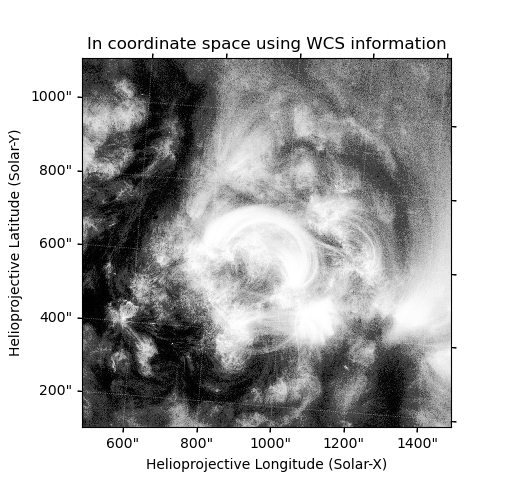
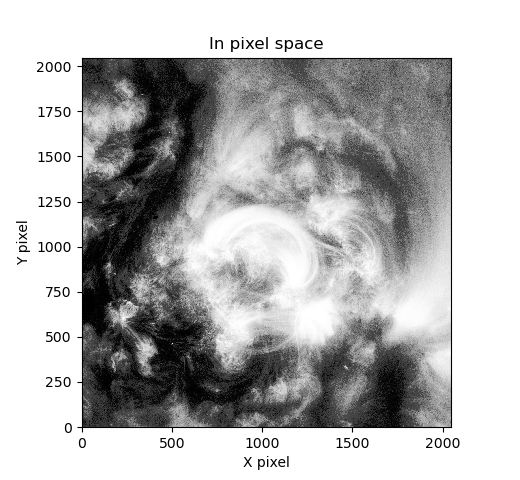
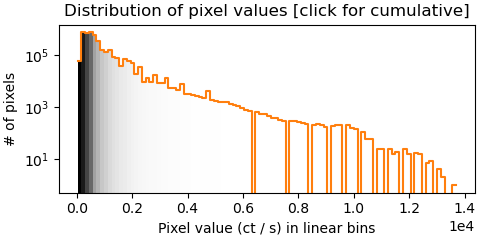
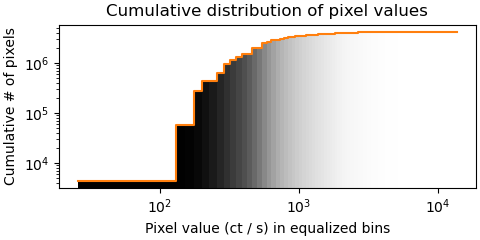

In [28]:
eui_seq

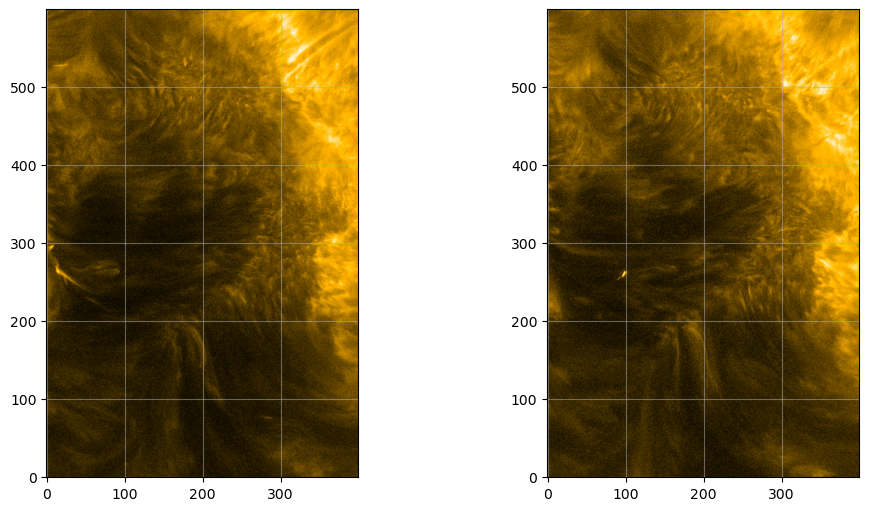

In [29]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5),layout='constrained')

ax1.imshow(eui_seq[0].data[200:800,400:800], origin='lower', cmap='sdoaia171',norm=ImageNormalize(stretch=AsinhStretch()),aspect='equal')
ax2.imshow(eui_seq[-1].data[200:800,400:800], origin='lower', cmap='sdoaia171',norm=ImageNormalize(stretch=AsinhStretch()),aspect='equal')

for ax_ in (ax1,ax2):
    ax_.grid("on",alpha=0.5)

In [30]:
eui_seq0_east = eui_seq[0].submap([400,200]*u.pixel, top_right=[800,800]*u.pixel)
eui_seq1_east = eui_seq[-1].submap([400,200]*u.pixel, top_right=[800,800]*u.pixel)

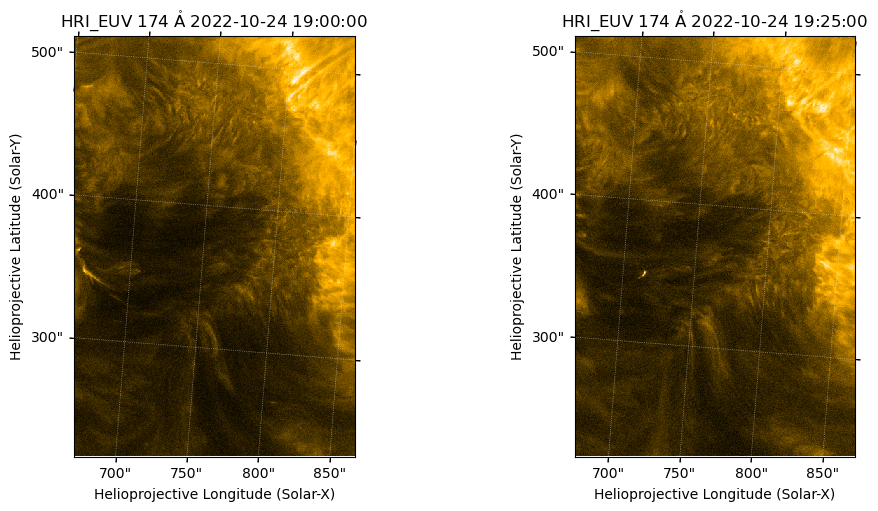

In [31]:
fig = plt.figure(figsize=(10,5),constrained_layout=True)

ax1 = fig.add_subplot(121,projection=eui_seq0_east)
ax2 = fig.add_subplot(122,projection=eui_seq1_east)

eui_seq0_east.plot(axes=ax1, cmap='sdoaia171',norm=ImageNormalize(stretch=AsinhStretch()))
eui_seq1_east.plot(axes=ax2, cmap='sdoaia171',norm=ImageNormalize(stretch=AsinhStretch()))


In [34]:
with h5py.File("../../src/EUI/HRI/euv174/20221024/coalign_shifts.h5","r") as f:
    eui_map_seq_coalign_shifts_x = f["x"][()]
    eui_map_seq_coalign_shifts_y = f["y"][()]
eui_map_seq_coalign_shifts = {"x":eui_map_seq_coalign_shifts_x*u.arcsec,"y":eui_map_seq_coalign_shifts_y*u.arcsec}

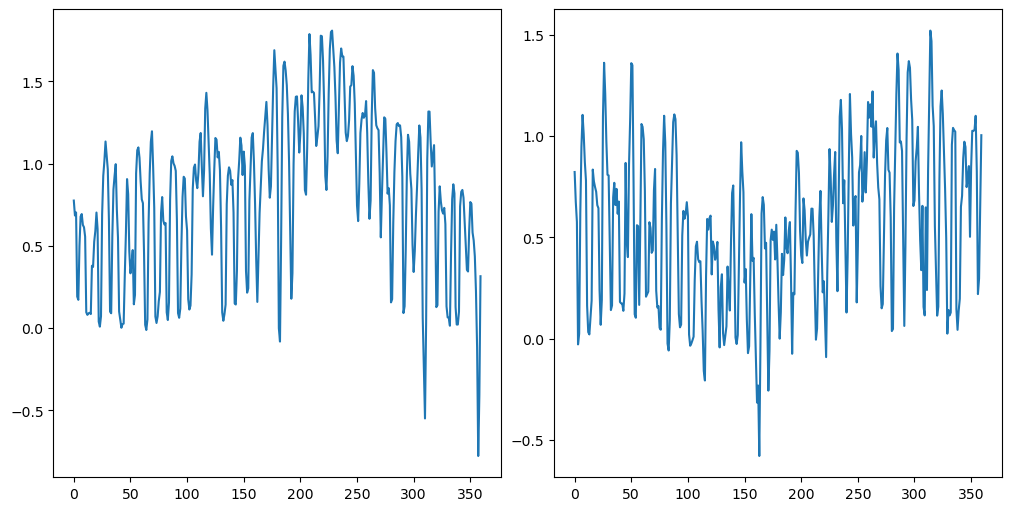

In [37]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,5),layout='constrained')

ax1.plot(eui_map_seq_coalign_shifts_x)
ax2.plot(eui_map_seq_coalign_shifts_y)


In [76]:
result = cv2.matchTemplate(eui_seq[0].data,eui_seq[3].data[500:1000,500:1000],cv2.TM_CCOEFF_NORMED)
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)

In [77]:
min_val, max_val, min_loc, max_loc

(-0.5509478449821472, 0.9299091696739197, (1021, 885), (499, 501))

In [78]:
result

array([[ 0.01995416,  0.02248931,  0.02519988, ...,  0.17694376,
         0.17685619,  0.1767381 ],
       [ 0.01764897,  0.02020769,  0.02302952, ...,  0.17664343,
         0.1765368 ,  0.17643724],
       [ 0.01540729,  0.01813587,  0.02090076, ...,  0.17641295,
         0.17626758,  0.17618115],
       ...,
       [-0.30382776, -0.30290666, -0.30220246, ..., -0.10337118,
        -0.10208387, -0.10119084],
       [-0.30302617, -0.30213585, -0.30136913, ..., -0.10419385,
        -0.10321601, -0.10218313],
       [-0.30217755, -0.30131388, -0.3005188 , ..., -0.10544155,
        -0.10414837, -0.10266915]], dtype=float32)

In [63]:
w, h = eui_seq[-1].data[500:1000,500:1000].shape[::-1]
w, h

(500, 500)

In [56]:
top_left = min_loc

In [57]:
top_left

(500, 500)

In [66]:
bottom_right = (top_left[0] + w, top_left[1] + h)
bottom_right    

(1000, 1000)